# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Load Dataset**

In [52]:
df = pd.read_csv('marketing_campaign_data.csv')
pd.set_option('display.max_columns',None)

In [53]:
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
123,123,7386,1976,S1,Cerai,30992000.0,1,0,22-04-2013,83,17000,0,14000,7000,3000,2000,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1434,1434,3388,1967,S1,Cerai,70844000.0,1,1,30-10-2013,16,129000,26000,67000,3000,67000,2000,5,6,1,5,7,0,0,0,0,0,0,3,11,0
1657,1657,2295,1954,S3,Menikah,62670000.0,0,1,02-02-2014,57,539000,30000,92000,80000,46000,38000,1,5,3,13,3,0,0,0,0,0,0,3,11,0


In [54]:
df.shape

(2240, 30)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# 1. Feature Engineering

In [56]:
df1 = df.copy()

In [57]:
df2 = df.copy()

## 1.1 Age & Group Age

In [58]:
df2['age'] = 2024 - df2['Year_Birth']

In [59]:
df2.loc[(df2['age'] >= 0) & (df2['age'] < 12), 'age_range'] = "child"
df2.loc[(df2['age'] >= 12) & (df2['age'] < 18), 'age_range'] = "teens"
df2.loc[(df2['age'] >= 18) & (df2['age'] < 36), 'age_range'] = "young_adults"
df2.loc[(df2['age'] >= 36) & (df2['age'] < 55), 'age_range'] = "middle_aged_adults"
df2.loc[(df2['age'] >= 55), 'age_range'] = "older_adults"


## 1.2 Datetime

In [60]:
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])

## 1.3 Total Children & Parents

In [61]:
df2['total_children'] = df2['Kidhome'] + df2['Teenhome']
df2['is_parents'] = np.where(df2['total_children'] > 0, 1, 0)


## 1.4 Total Spending

In [62]:
df2['total_amount_spent'] = df2['MntCoke'] \
                              + df2['MntFruits'] \
                              + df2['MntMeatProducts'] \
                              + df2['MntFishProducts'] \
                              + df2['MntSweetProducts'] \
                              + df2['MntGoldProds']


## 1.5 Total Accepted Campaign

In [63]:
df2['total_accepted_campaign'] = df2['AcceptedCmp1'] \
                                    + df2['AcceptedCmp2'] \
                                    + df2['AcceptedCmp3'] \
                                    + df2['AcceptedCmp4'] \
                                    + df2['AcceptedCmp5']

## 1.6 Total Transaction

In [64]:
df2['total_trx'] = df2['NumDealsPurchases'] \
                            + df2['NumWebPurchases'] \
                            + df2['NumCatalogPurchases'] \
                            + df2['NumStorePurchases']

In [65]:
df2.head(2)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_range,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,older_adults,0,0,1617000,0,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,older_adults,2,1,27000,0,6


## 1.7 Conversion Rate

In [66]:
def calculate_conversion_rate(x,y):
    if y == 0 :
       return 0
    return x/y

df2['Conversion_Rate'] = round(df2.apply(lambda row:calculate_conversion_rate(row['Response'], row['NumWebVisitsMonth']),axis=1),2)

In [67]:
# Lowest conversion rate
lowest_conversion_rate = df2['Conversion_Rate'].min()
lowest_conversion_rate_count = df2[df2['Conversion_Rate'] == lowest_conversion_rate].shape[0]

# Highest conversion rate
highest_conversion_rate = df2['Conversion_Rate'].max()
highest_conversion_rate_count = df2[df2['Conversion_Rate'] == highest_conversion_rate].shape[0]

In [68]:
response = df2.pop('Response')
df2['Response'] = response

df2.head(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,age,age_range,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx,Conversion_Rate,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,67,older_adults,0,0,1617000,0,25,0.14,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,70,older_adults,2,1,27000,0,6,0.00,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,59,older_adults,0,0,776000,0,21,0.00,0


# 2. Statistical Summary

In [69]:
num = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age','total_children', 'total_amount_spent'
                     ]

cat = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_range'
                       ]

In [70]:
df2[num].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,total_children,total_amount_spent
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,55.194196,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,28.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,47.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,54.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,65.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,131.000000,3.000000,2.525000e+06


In [71]:
df2[cat].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Exploratory Data Analysis

## 3.1 Heatmap

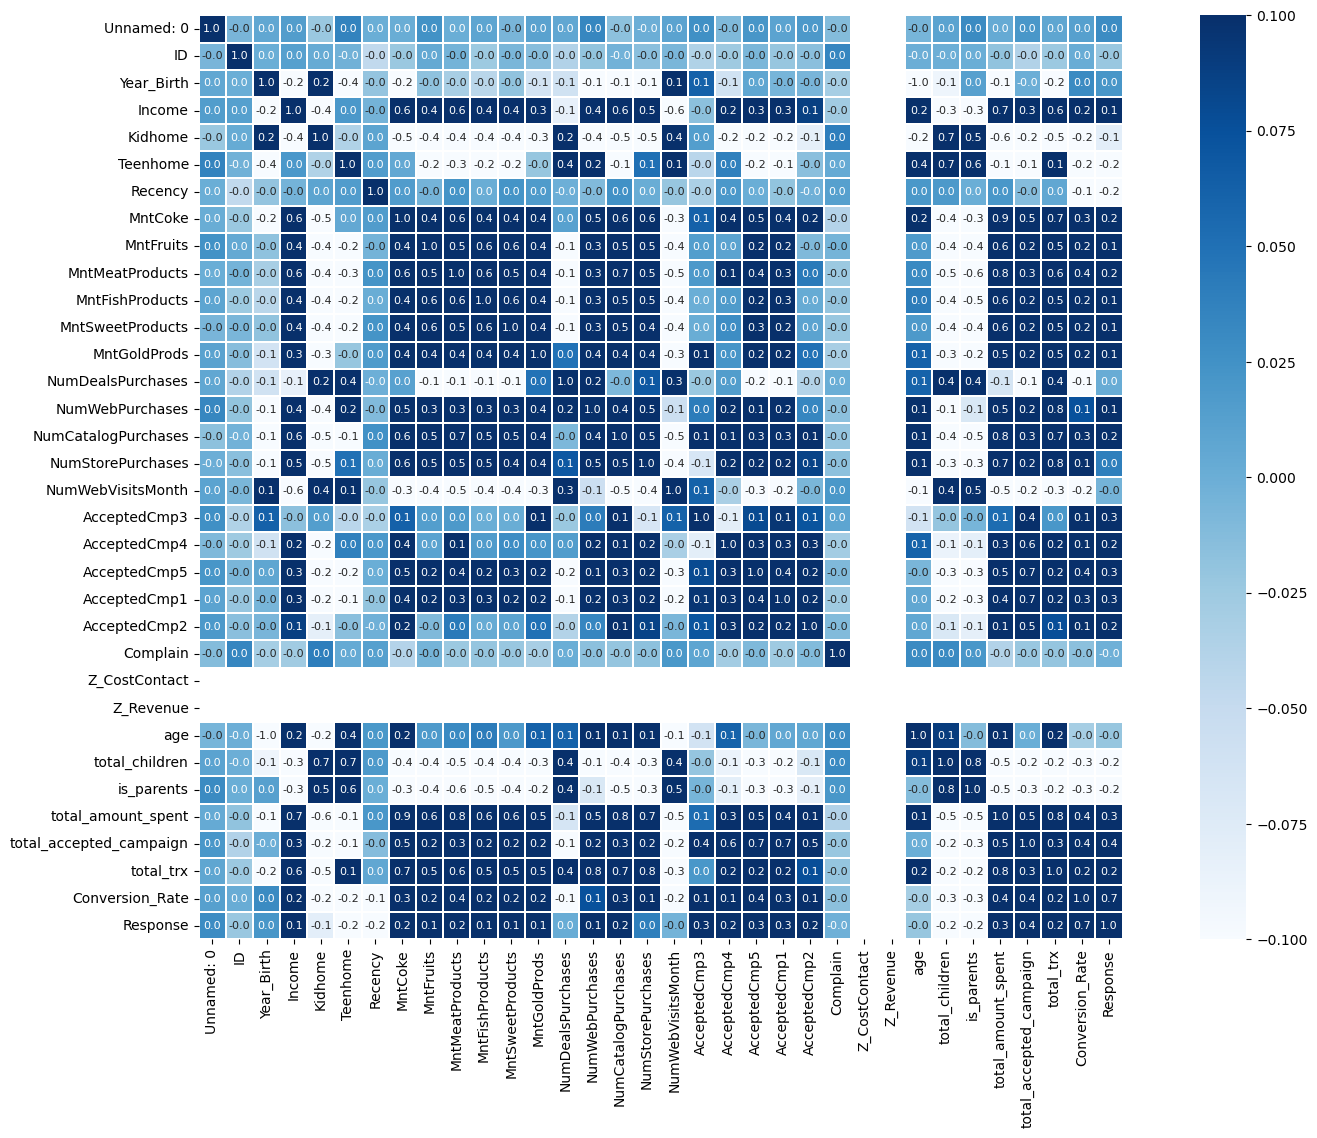

In [72]:
plt.figure(figsize=(20, 12))
corrmat = df2.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})
plt.show()

## 3.2 Conversion Rate Based on Marital Status

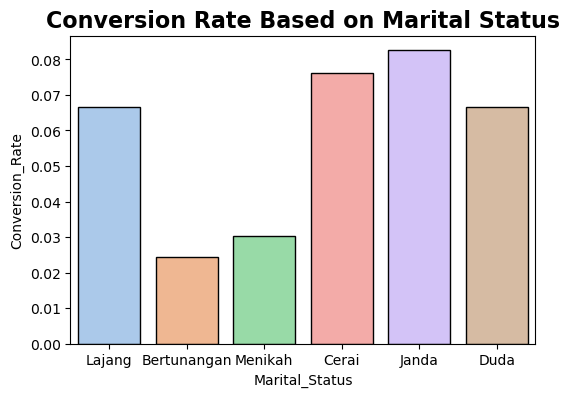

In [73]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Marital_Status', y='Conversion_Rate', data=df2, ci=None,palette='pastel',edgecolor='black')
plt.title('Conversion Rate Based on Marital Status',fontsize=16,fontweight='bold')
plt.show()

Berdasarkan grafik hubungan antara **Martial Status** dengan **Conversion Rate**, dapat dilihat bahwa conversion rate tertinggi dimiliki oleh customer dengan status **janda** sedangkan yang terendah **bertunangan**. Mayoritas customer yang memiliki conversion rate > 0.5 yaitu berstatus **Lajang**, **Cerai**, **Janda**, dan **Duda**. Sehingga mungkin dapat campaign dapat ditargetkan kepada customer dengan status tersebut diatas.

## 3.3 Conversion Rate Based on Group Age

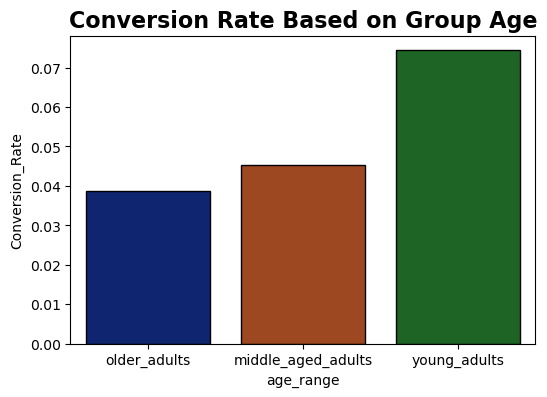

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(x='age_range', y='Conversion_Rate', data=df2, ci=None,palette='dark',edgecolor='black')
plt.title('Conversion Rate Based on Group Age',fontsize=16,fontweight='bold')

plt.show()

Mayoritas customer dengan conversion rate tinggi adalah seorang remaja yang berusia 28 - 35 tahun. Sedangkan yang terendah yaitu orang tua yang berumur 46 - 65 tahun. Sehingga mungkin campaign dapat ditargetkan kepada customer remaja dan dewasa yang mana memiliki conversion rate yang cukup tinggi.

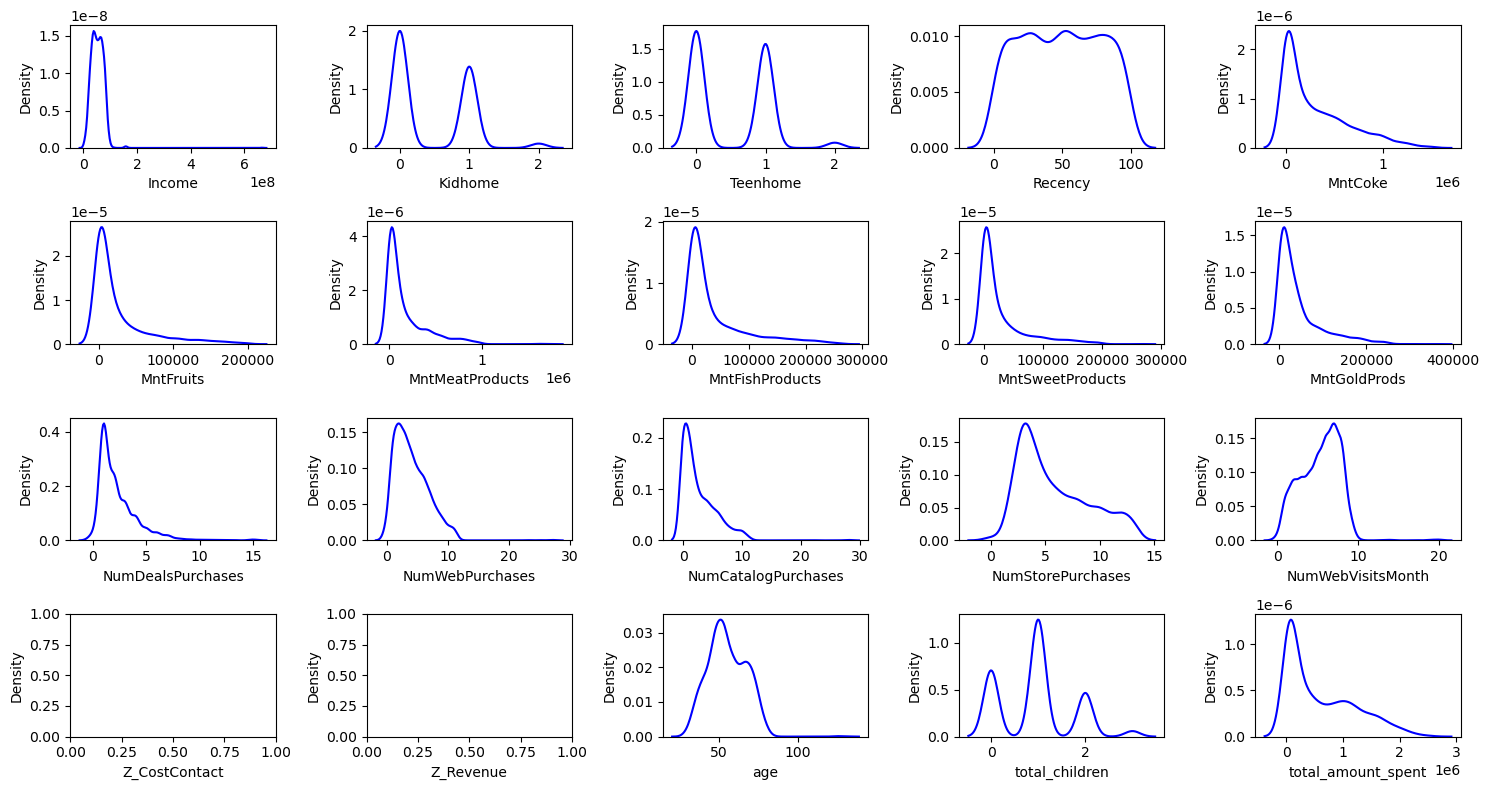

In [75]:
features = num  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(15,8))
for i in range(0, len(features)):
  plt.subplot(4, 5, i+1)
  sns.kdeplot(x = df2[features[i]], color = 'blue')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

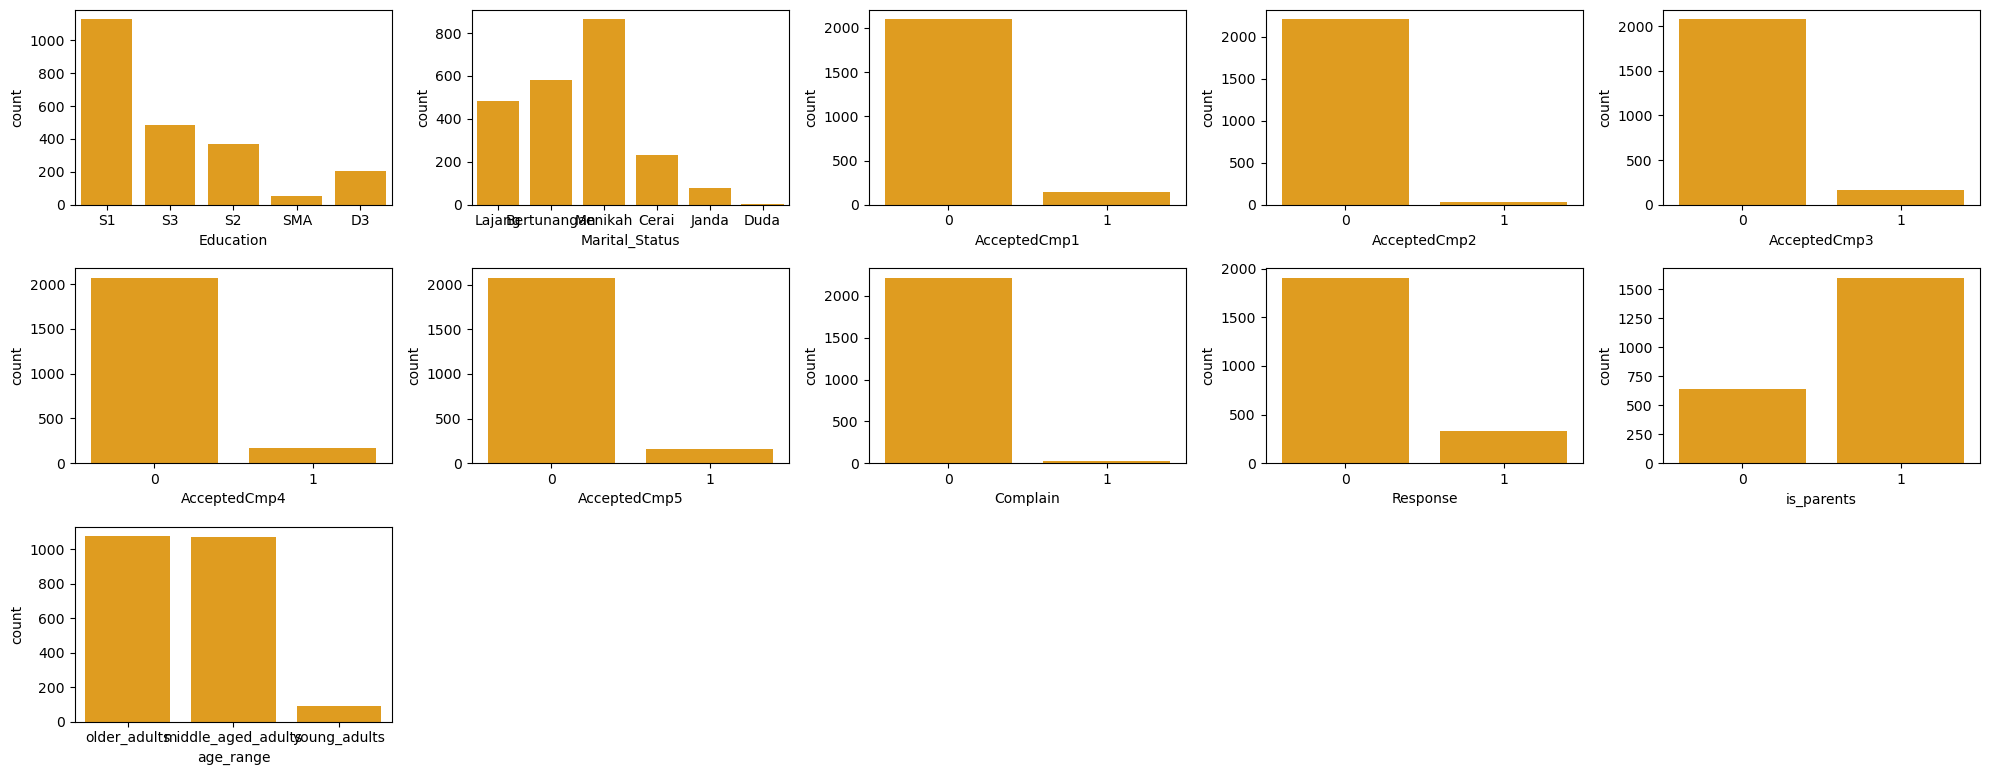

In [76]:
feat = cat  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(20,10))
for i in range(0, len(feat)):
  plt.subplot(4, 5, i+1)
  sns.countplot(x=df2[feat[i]], color='orange')
  plt.tight_layout()

# 4. Data Cleaning and Preprocessing

In [77]:
df2.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'age',
       'age_range', 'total_children', 'is_parents', 'total_amount_spent',
       'total_accepted_campaign', 'total_trx', 'Conversion_Rate', 'Response'],
      dtype='object')

## 4.1 Null Values

In [78]:
df2.isna().sum()

Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
age                         0
age_range                   0
total_children              0
is_parents                  0
total_amou

Karena data null hanya berjumlah 24 baris (**1.08%**), jadi cukup dilakukan *drop* terhadap baris null tersebut.

In [79]:
df2.dropna(inplace=True)

## 4.2 Duplicate Rows

In [80]:
df2.duplicated().sum()

0

Tidak terdapat baris duplikata pada dataset ini, sehingga tidak perlu dilakukan penghapusan baris duplikat

## 4.3 Drop Unnecessary Data

In [81]:
df2.drop(['Unnamed: 0','ID','Dt_Customer'],axis=1,inplace=True)

In [82]:
df2.head(1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,age,age_range,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx,Conversion_Rate,Response
0,1957,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,67,older_adults,0,0,1617000,0,25,0.14,1


## 4.4 Feature Encoding

In [83]:
for col in cat:
    print(f'value counts of column {col}')
    print(df2[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2074
1     142
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2054
1     162
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

In [84]:
edu_mapping = {'SMA' : 1,
               'D3' : 2,
               'S1' : 3,
               'S2' : 4,
               'S3' : 5}
df2['Education'] = df2['Education'].map(edu_mapping)

In [86]:
onehot = pd.get_dummies(df1['Marital_Status'],prefix = 'status')
df2 = df2.join(onehot)

In [88]:
df2.drop('Marital_Status',axis=1,inplace=True)

In [91]:
onehot1 = pd.get_dummies(df2['age_range'])
df2 = df2.join(onehot1)
df2.drop('age_range',axis=1,inplace=True)

In [94]:
df2.sample(2)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,age,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx,Conversion_Rate,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,middle_aged_adults,older_adults,young_adults
373,1966,3,63810000.0,0,1,45,977000,12000,253000,16000,12000,101000,4,4,3,12,8,0,1,0,0,0,0,3,11,58,1,1,1371000,1,23,0.0,0,0,0,0,0,1,0,0,1,0
1275,1971,3,66303000.0,0,1,56,1090000,12000,96000,16000,12000,60000,4,3,4,11,8,0,1,0,0,0,0,3,11,53,1,1,1286000,1,22,0.0,0,0,0,0,0,0,1,1,0,0


## 4.4 Standardization

In [95]:
df_std = df2.copy()

In [97]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in num:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape, df_std.head(3))

(2216, 42)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,age,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx,Conversion_Rate,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,middle_aged_adults,older_adults,young_adults
0,1957,3,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,0.986443,-1.264803,0,1.675488,0,25,0.14,1,0,0,0,0,1,0,0,1,0
1,1954,3,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,1.236801,1.405806,1,-0.962358,0,6,0.00,0,0,0,0,0,1,0,0,1,0
2,1965,3,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0.318822,-1.264803,0,0.280250,0,21,0.00,0,1,0,0,0,0,0,0,1,0


In [98]:
df2.head(3)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,age,total_children,is_parents,total_amount_spent,total_accepted_campaign,total_trx,Conversion_Rate,Response,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,middle_aged_adults,older_adults,young_adults
0,1957,3,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,67,0,0,1617000,0,25,0.14,1,0,0,0,0,1,0,0,1,0
1,1954,3,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,70,2,1,27000,0,6,0.00,0,0,0,0,0,1,0,0,1,0
2,1965,3,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,59,0,0,776000,0,21,0.00,0,1,0,0,0,0,0,0,1,0


# 5. Modelling (K-Means Clustering)

In [99]:
df3 = df_std.copy()

In [101]:
from sklearn.cluster import KMeans
x = df3.drop(columns=['Year_Birth']).copy()

inertia = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x.values)
    inertia.append(kmeans.inertia_)

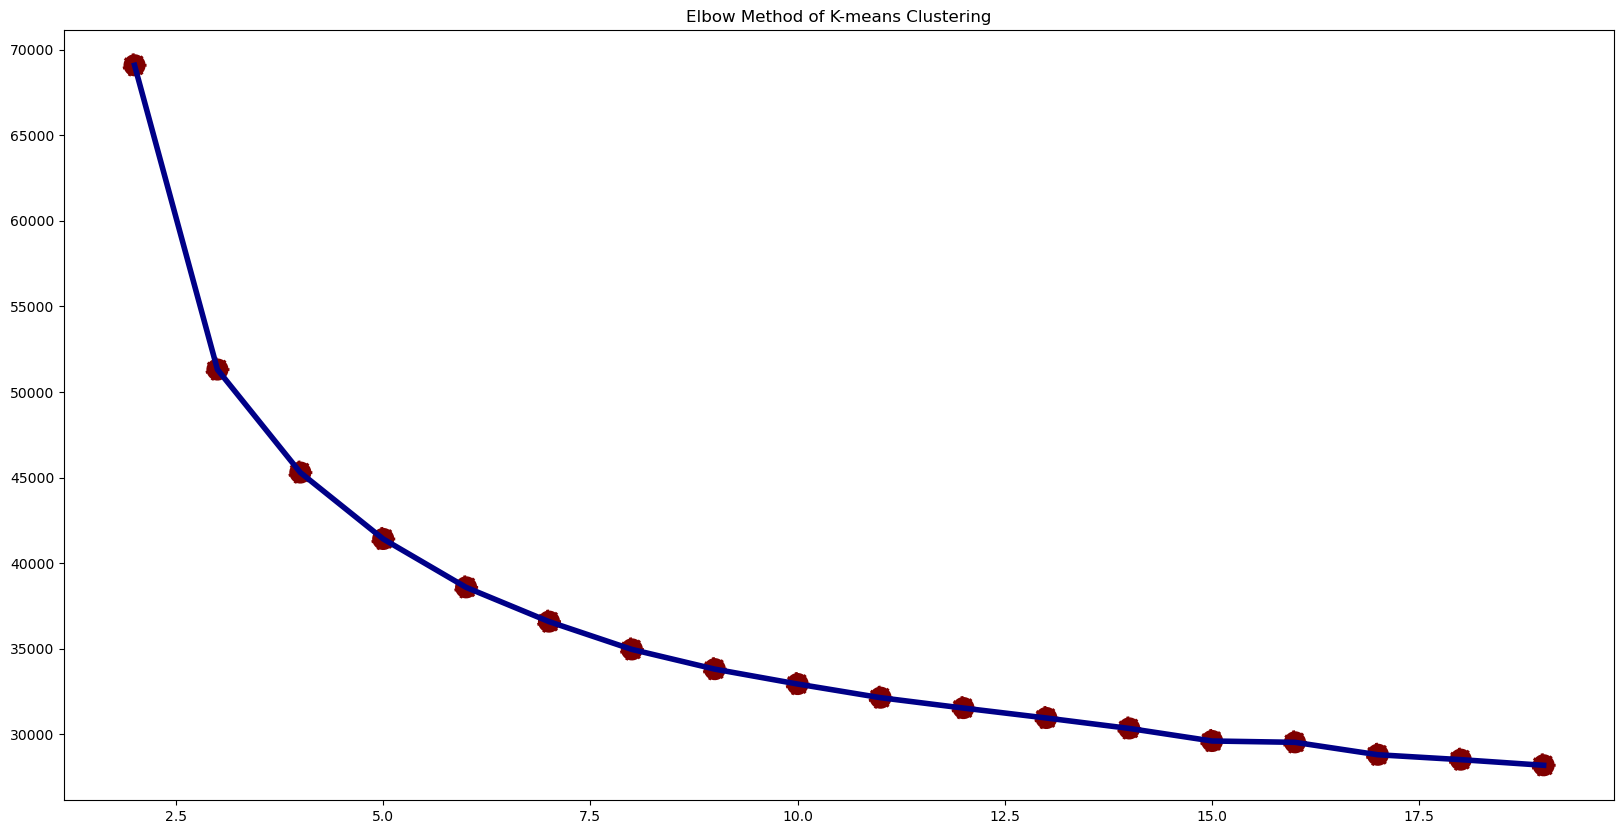

In [103]:
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')


sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [104]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0     25.731437
1     11.729431
2      8.570029
3      6.825886
4      5.187254
5      4.439742
6      3.298184
7      2.575044
8      2.423072
9      1.886631
10     1.839767
11     1.968628
12     2.420064
13     0.262929
14     2.458262
15     0.993578
16     1.153455
17          NaN
dtype: float64

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x.values)
x['cluster'] = kmeans.labels_
df2['cluster'] = kmeans.labels_

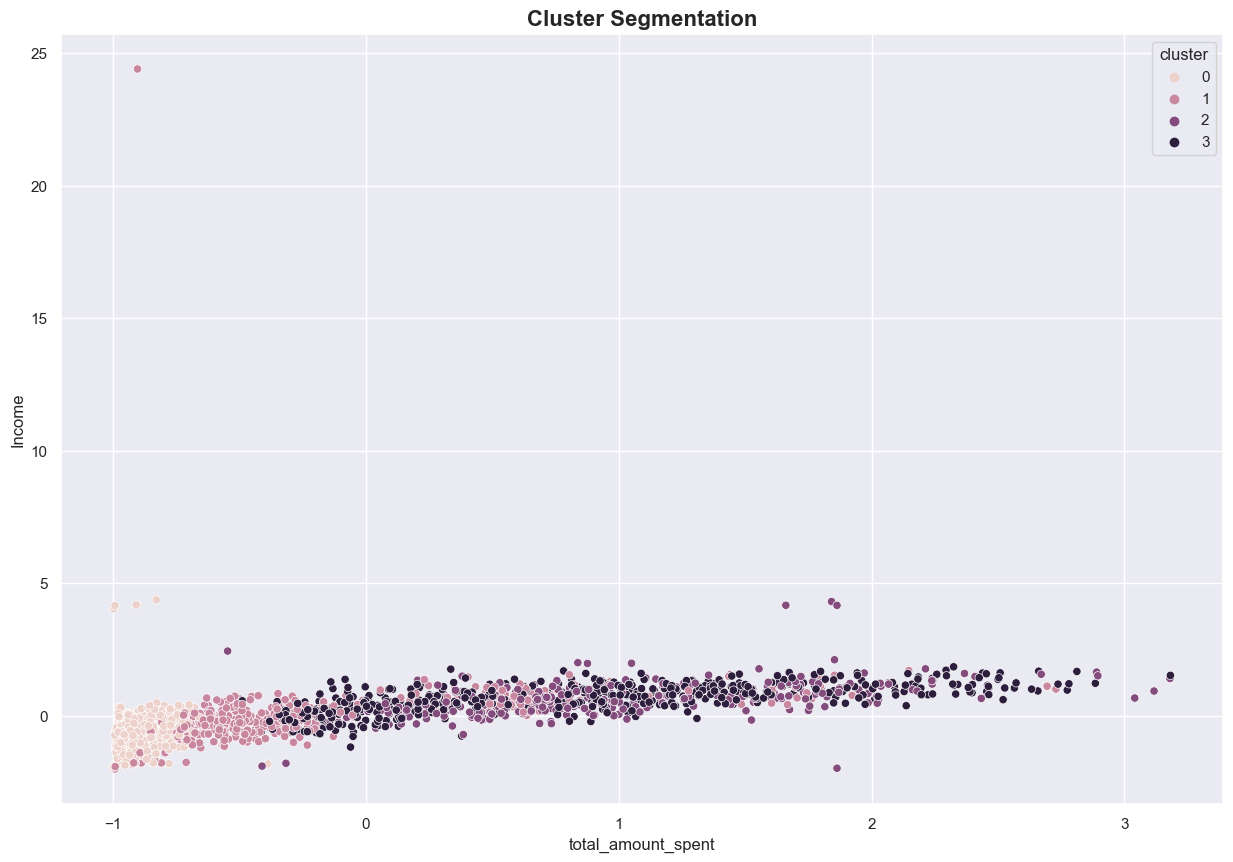

In [150]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=x, x='total_amount_spent', y='Income', hue='cluster')
plt.title('Cluster Segmentation',fontsize=16,fontweight='bold')
plt.show()

# 6. Evaluation (Silhouette Score)

In [108]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

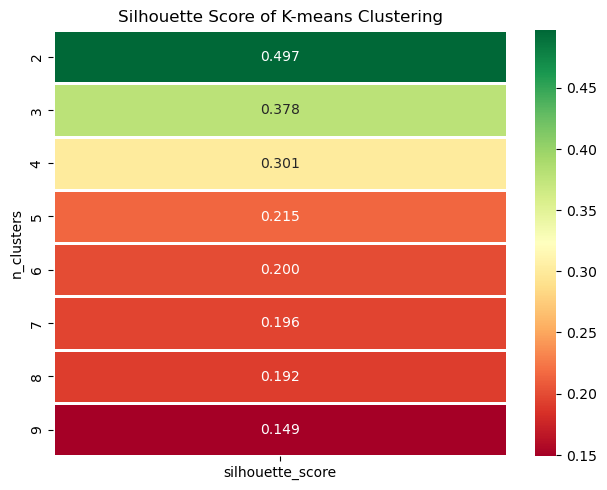

In [109]:
visualize_silhouette_layer(x)

# 7. Customer Personality Analysis for Marketing Retargeting

## 7.1 Cluster Analysis and Interpretation

### Statistical Summary for each Cluster

In [110]:
num

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'age',
 'total_children',
 'total_amount_spent']

In [111]:
df2[num+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

Income                                                      \
         count          mean           std         min         25%   
cluster                                                              
0        818.0  3.349084e+07  1.435896e+07   3502000.0  24605250.0   
1        452.0  5.217766e+07  3.334515e+07   1730000.0  40677000.0   
2        327.0  6.817145e+07  1.639162e+07   2447000.0  58340000.0   
3        619.0  6.867210e+07  1.324489e+07  22507000.0  60191000.0   

                                             total_amount_spent                \
                50%         75%          max              count          mean   
cluster                                                                         
0        32922000.0  40418500.0  162397000.0              818.0  6.436919e+04   
1        49766000.0  62543250.0  666666000.0              452.0  4.737633e+05   
2        67369000.0  77135000.0  160803000.0              327.0  1.183865e+06   
3        70116000.0  78630000.0   98777000.0              619.0  1.116898e+06   

                                                                             
                   std       min       25%        50%        75%        max  
cluster                                                                      
0         44653.877690    5000.0   33000.0    53500.0    81000.0   373000.0  
1        405155.259365    8000.0  233000.0   319500.0   487500.0  2252000.0  
2        394854.302863  277000.0  905000.0  1095000.0  1475500.0  2524000.0  
3        508826.949983  264000.0  661500.0  1106000.0  1458500.0  2525000.0

In [112]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Low Spender',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df2['cluster_mapped'] = df2['cluster'].map(map_cluster)

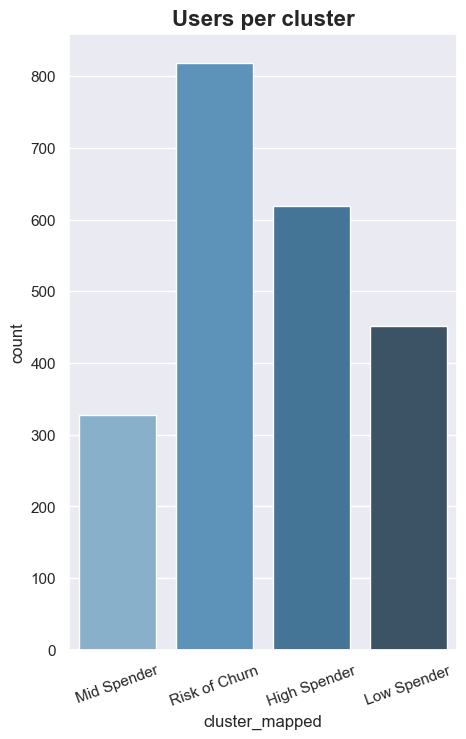

In [151]:
sns.set(rc={'figure.figsize':(5,8)})
sns.countplot(x=df2['cluster_mapped'], palette='Blues_d')
plt.title('Users per cluster',fontsize=16,fontweight='bold')
plt.xticks(rotation=20)
plt.show()

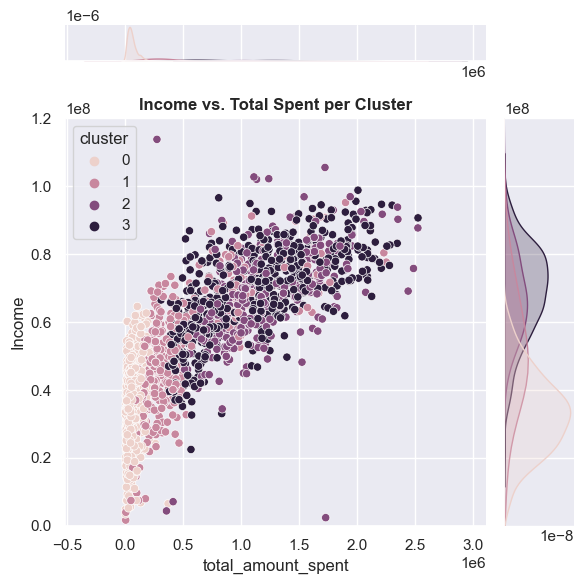

In [130]:
plot = sns.jointplot(x=df2["total_amount_spent"], y=df2["Income"], hue=df2["cluster"])
plt.title('Income vs. Total Spent per Cluster',fontsize=12,fontweight='bold')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.tight_layout()
plt.show()

### Total Income per Cluster

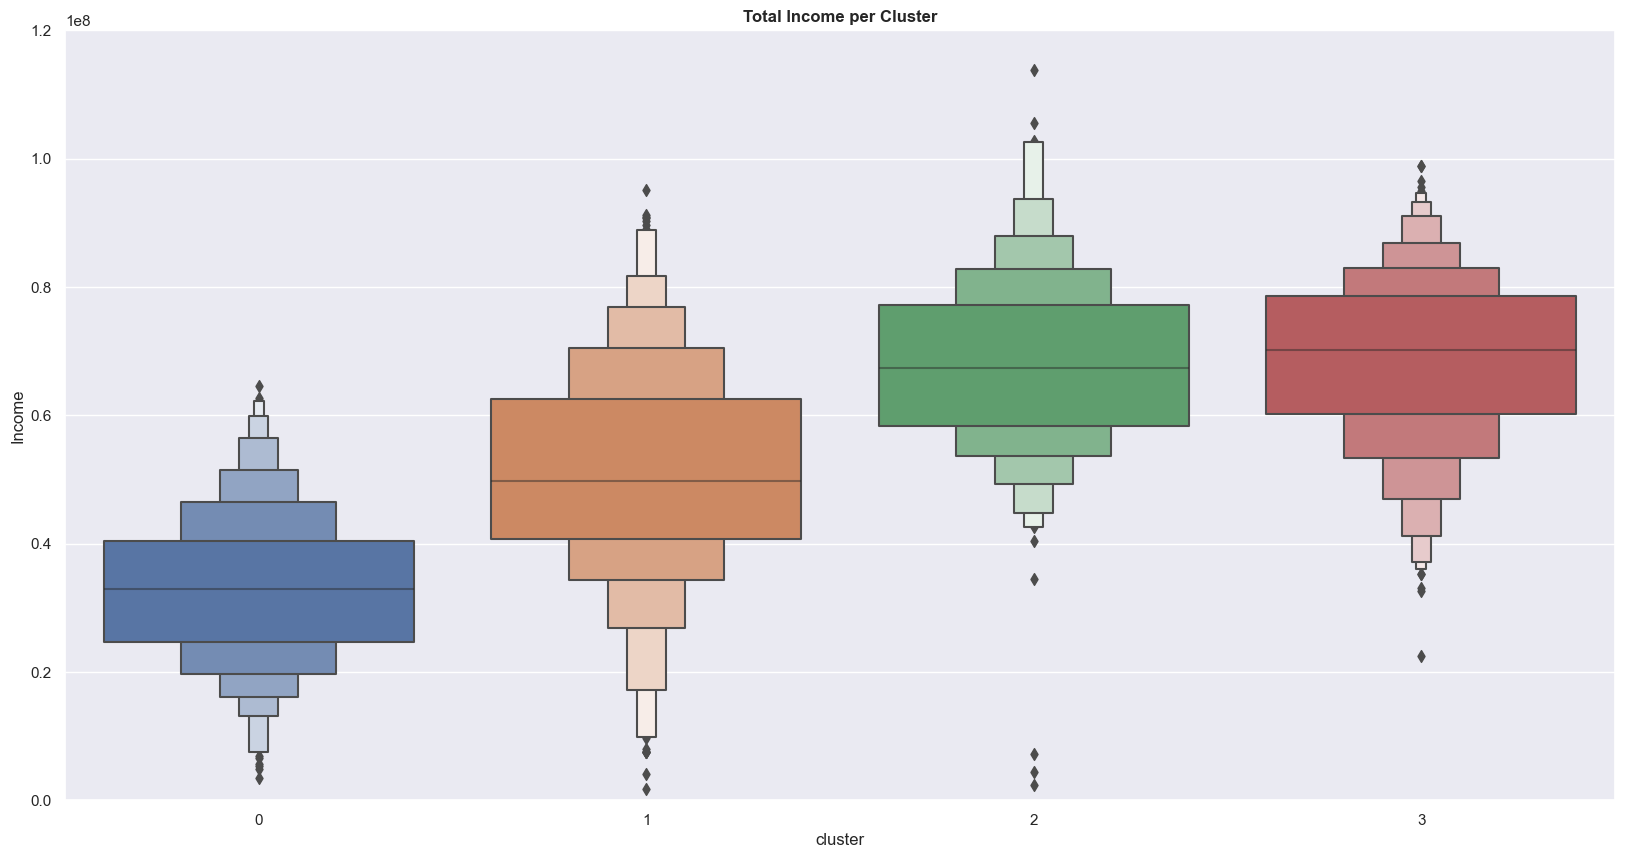

In [131]:
plt.figure(figsize=(20,10))
sns.boxenplot(x=df2['cluster'], y=df2['Income'])
plt.title('Total Income per Cluster',fontsize=12,fontweight='bold')
plt.ylim(0, 120000000)
plt.show()

### Total Spending per Cluster

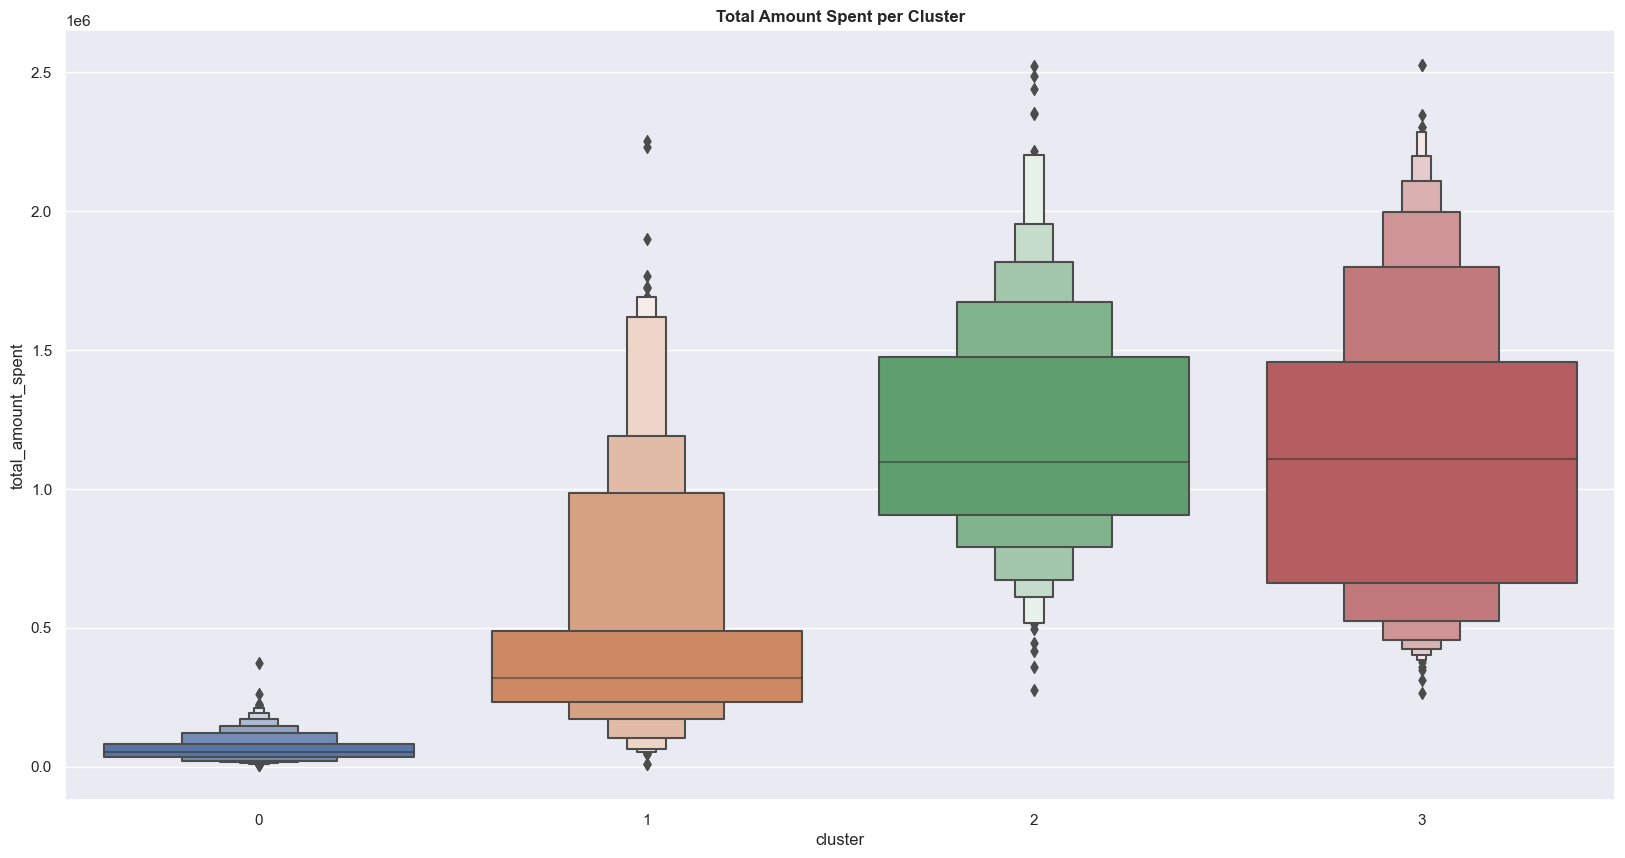

In [132]:
plt.figure(figsize=(20,10))
sns.boxenplot(x=df2['cluster'], y=df2['total_amount_spent'])
plt.title('Total Amount Spent per Cluster',fontsize=12,fontweight='bold')
plt.show()

### Total Visit per Cluster

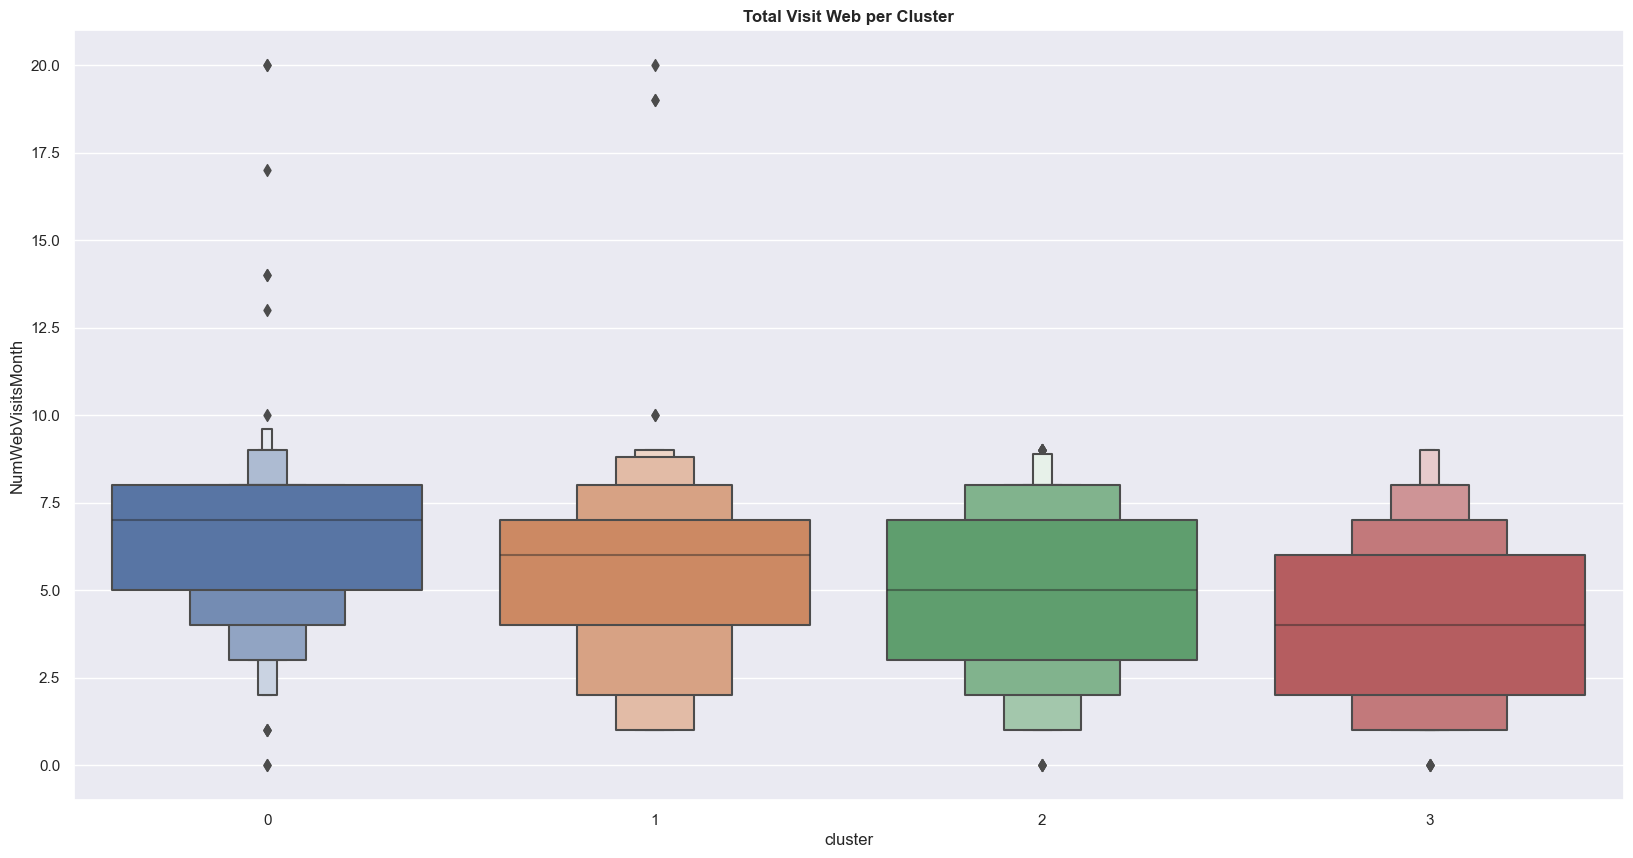

In [133]:
plt.figure(figsize=(20,10))
sns.boxenplot(x=df2['cluster'], y=df2['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster',fontsize=12,fontweight='bold')
plt.show()

### Deal Purchased per Cluster

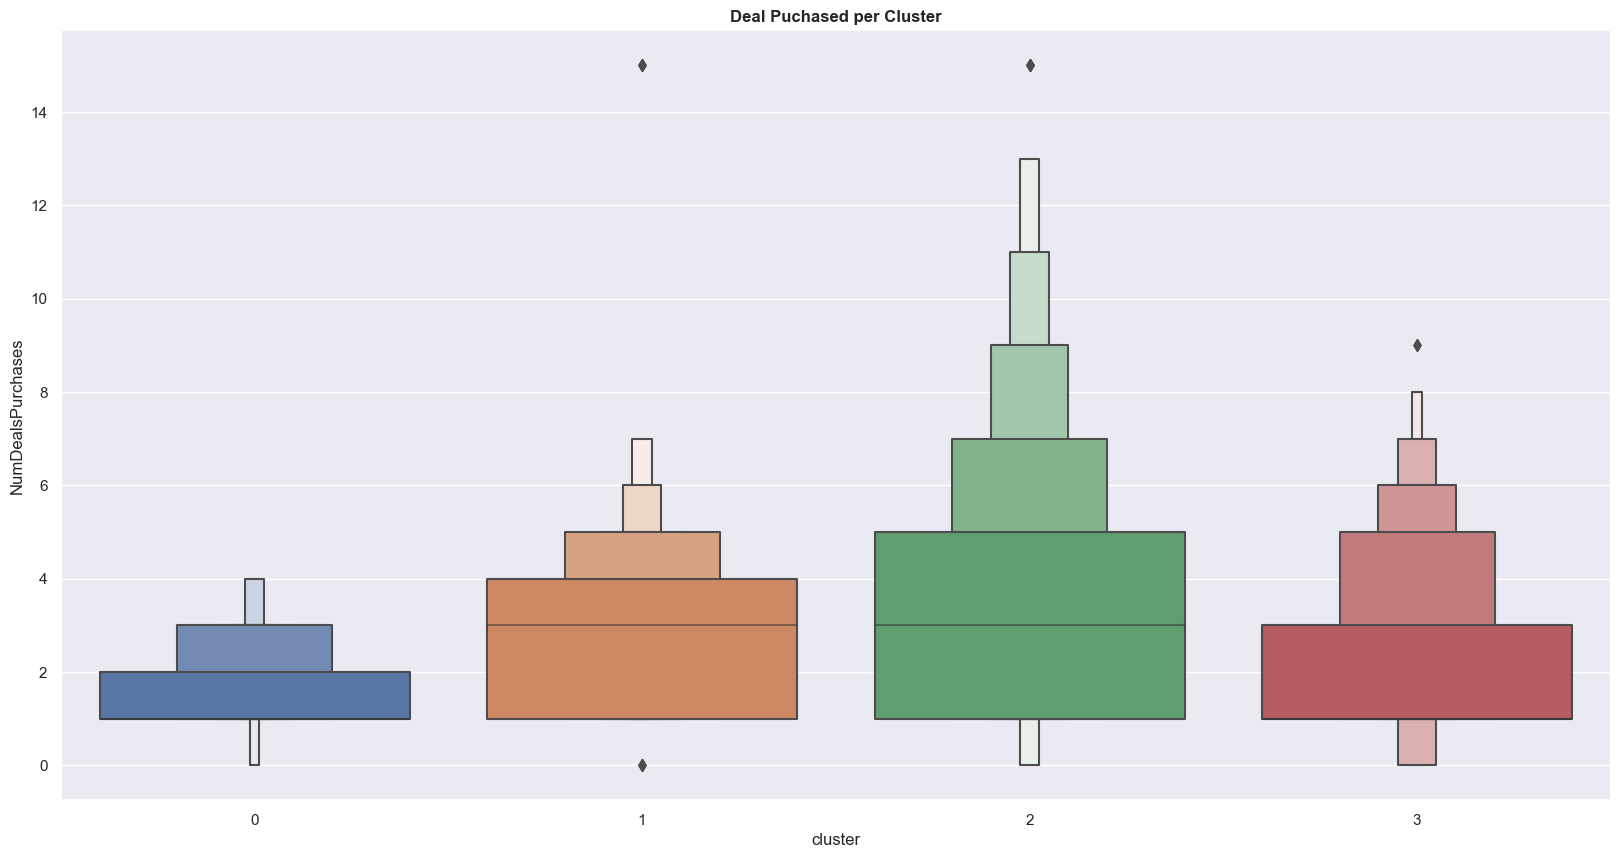

In [134]:
plt.figure(figsize=(20,10))
sns.boxenplot(x=df2['cluster'], y=df2['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster',fontsize=12,fontweight='bold')
plt.show()

### Conversion Rate per Cluster

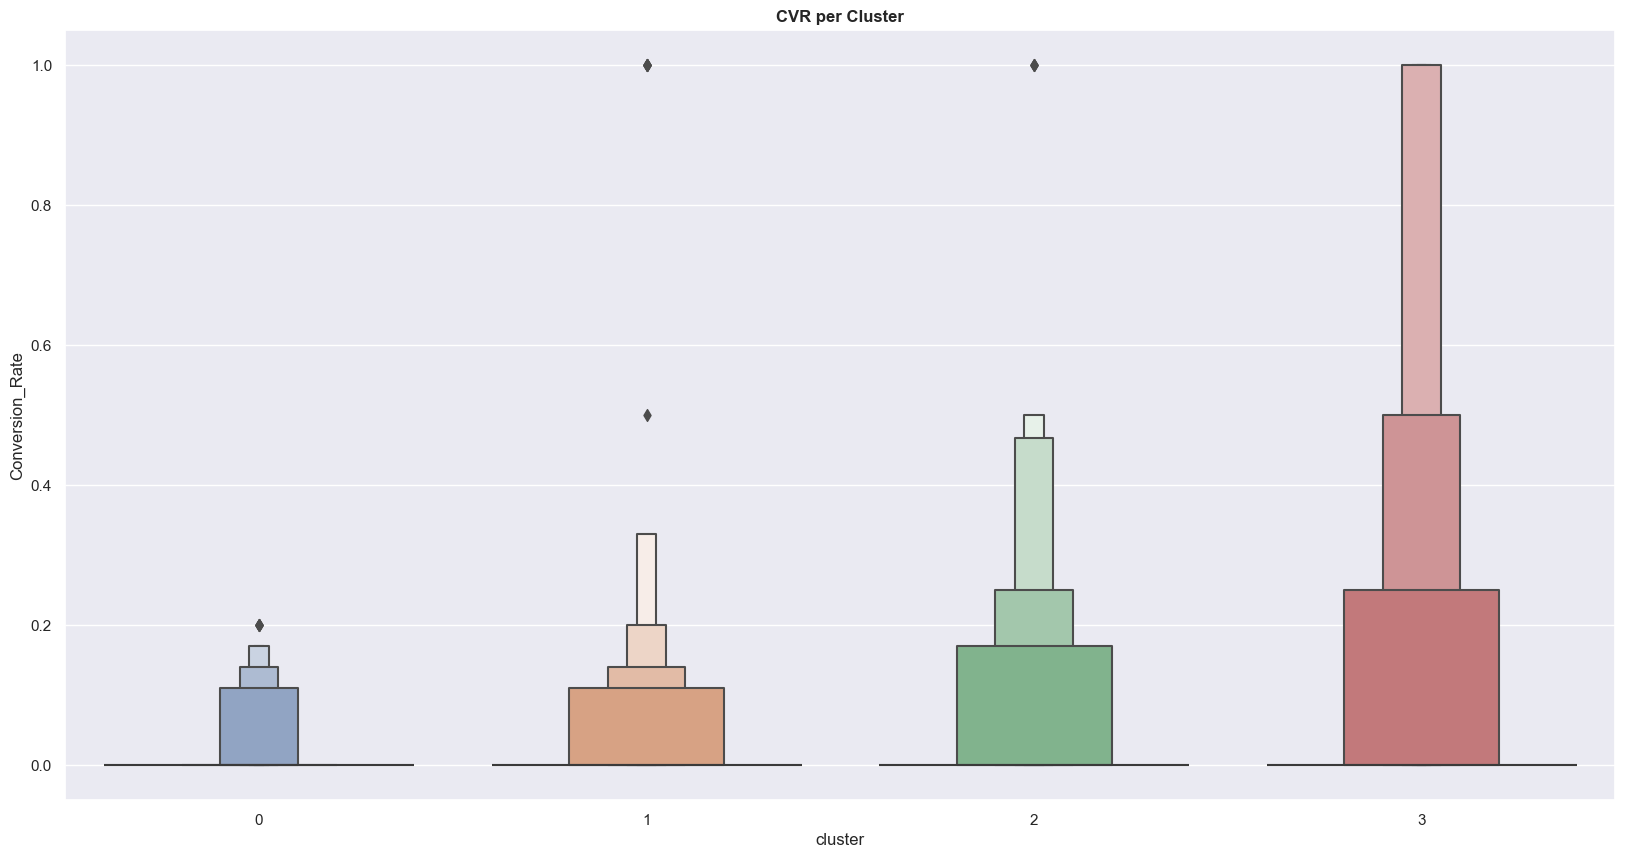

In [135]:
plt.figure(figsize=(20,10))
sns.boxenplot(x=df2['cluster'], y=df2['Conversion_Rate'])
plt.title('CVR per Cluster',fontsize=12,fontweight='bold')
plt.show()

# 8. Cluster Summary

In [141]:
df2.groupby('cluster')['Income','age','total_amount_spent',
                      'NumWebVisitsMonth','total_accepted_campaign','Conversion_Rate','Response',
                      'total_trx'].agg(['mean','median']).reset_index()

cluster        Income                    age        total_amount_spent  \
                   mean      median       mean median               mean   
0       0  3.349084e+07  32922000.0  52.504890   51.0       6.436919e+04   
1       1  5.217766e+07  49766000.0  56.073009   55.0       4.737633e+05   
2       2  6.817145e+07  67369000.0  57.712538   57.0       1.183865e+06   
3       3  6.867210e+07  70116000.0  56.723748   57.0       1.116898e+06   

             NumWebVisitsMonth        total_accepted_campaign         \
      median              mean median                    mean median   
0    53500.0          6.393643    7.0                0.080685    0.0   
1   319500.0          5.542035    6.0                0.232301    0.0   
2  1095000.0          4.853211    5.0                0.483180    0.0   
3  1106000.0          3.982229    4.0                0.536349    0.0   

  Conversion_Rate         Response         total_trx         
             mean median      mean median       mean median  
0        0.011015    0.0  0.080685    0.0   6.603912    7.0  
1        0.031150    0.0  0.130531    0.0  14.097345   14.0  
2        0.053456    0.0  0.198777    0.0  26.868502   26.0  
3        0.089515    0.0  0.231018    0.0  20.058158   20.0

1. **Risk of Churn**:
- Kelompok ini adalah kelompok dengan jumlah user terbesar kurang lebih 800 orang yang di dominasi oleh middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya, yang masing-masing sebesar IDR 33.4 Juta untuk total pendapatan setahun, dan IDR 53K untuk pengeluaran dalam setahun
- Walaupun demikian, kelompok ini menduduki peringkat pertama untuk kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya. Selain itu juga kelompok ini merupakan kelompok yang paling jarang atau hampir tidak pernah menerima *campaign*.


2. **Low Spender**:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 0, dengan median sebanyak **6 kali dalam sebulan**, walaupun demikian, kelompok ini cukup jarang menerima *campaign*. 
- Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 49 Juta untuk total pendapatan setahun, dan IDR 319K untuk pengeluaran dalam setahun


3. **Mid Spender**:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 0-1 anak dan merupakan jumlah user paling sedikit
- Kelompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 67 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Walaupun cukup jarang untuk visit web, Kelompok ini adalah kelompok yang cukup sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan
- Kelompok ini juga merupakan kelompok yang paling sering melakukan transaksi pada platform kita dibandingkan dengan kelompok lainnya.


4. **High Spender**:
- Kelompok ini adalah kelompok dengan jumlah user terbesar kedua sebanyak 619 orang yang di dominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah belum/tidak menikah dan belum mempunyai anak 
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 70 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Cluster ini cukup banyak yang merupakan non-organic dengan merespon campaign, namun memiliki jumlah penggunaan promo yang paling sedikit dibandingkan dengan yang lainnya.
- Kelompok ini adalah kelompok yang mempunyai conversion rate terbesar untuk membeli produk kita, dan kita jangan sampai kehilangan mereka.

# 9. Recommendation and Potential Impact

**Recommendation**:
1. Tetap monitor transaksi dan retensi dari kelompok High Spender, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn
2. Untuk kelompok Mid Spender dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita
3. Untuk kelompok Low Spender dan Risk to Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

**Potential Impact**:
- Jika kita fokus untuk terus monitor kelompok High Spender, kita akan tetap mendapatkan potensial GMV sebesar IDR 691 Juta, sedangkan untuk kelompok Mid Spender sebesar IDR 387 Juta
- Jika kita dapat optimasi promo yang di spend untuk Mid Spender (dengan asumsi reduksi 50%) kita dapat melakukan reduksi cost seevsar IDR 50 Juta

In [142]:
df2[df2.cluster == 3].total_amount_spent.sum()

691360000

In [143]:
df2[df2.cluster == 2].total_amount_spent.sum()

387124000

In [145]:
df2[df2.cluster == 3].total_amount_spent.sum() / df2[df2.cluster == 3].total_trx.sum()

55682.989690721646

In [146]:
df2[df2.cluster == 2].total_amount_spent.sum() / df2[df2.cluster == 2].total_trx.sum()

44061.461415888916

In [148]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df2[df2.cluster == 2].total_amount_spent.sum() / df2[df2.cluster == 2].total_trx.sum()) * df2[df2.cluster == 2].NumDealsPurchases.sum()

50274127.47552925